# Chapter 1: Data Analytics and Algorithms

This notebook focuses on the fundamental concepts of data analytics, exploratory data analysis (EDA), and introduces the basic machine learning algorithms we'll be using throughout this project. We'll focus specifically on linear and logistic regression as our first algorithms.

In [2]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.datasets import load_diabetes, load_breast_cancer

# Configure visualizations
plt.style.use('seaborn-whitegrid')
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

C:\Users\aashu\AppData\Local\Temp\ipykernel_26264\934958693.py:15: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


## 1. Introduction to Data Analytics

Data analytics is the process of examining datasets to draw conclusions about the information they contain. It involves a series of steps, including data collection, cleaning, transformation, modeling, and interpretation.

### The Data Analytics Process:

1. **Data Collection**: Gathering relevant data from various sources
2. **Data Cleaning**: Handling missing values, outliers, and errors
3. **Data Exploration**: Understanding the patterns, relationships, and trends in data
4. **Feature Engineering**: Creating new features from existing ones
5. **Model Building**: Developing statistical or machine learning models
6. **Model Evaluation**: Assessing the performance of models
7. **Interpretation**: Drawing meaningful insights from the results

Let's begin with some exploratory data analysis (EDA) on a real dataset.

## 2. Exploratory Data Analysis (EDA)

We'll use the Diabetes dataset from scikit-learn to demonstrate exploratory data analysis.

In [3]:
# Load the diabetes dataset
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

# Convert to DataFrame for easier manipulation
df = pd.DataFrame(X, columns=diabetes.feature_names)
df['target'] = y

# Display the first few rows
print("Dataset shape:", df.shape)
df.head()

Dataset shape: (442, 11)


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [4]:
# Statistical summary of the dataset
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


In [5]:
# Check for missing values
print("Missing values:")
df.isnull().sum()

Missing values:


age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64

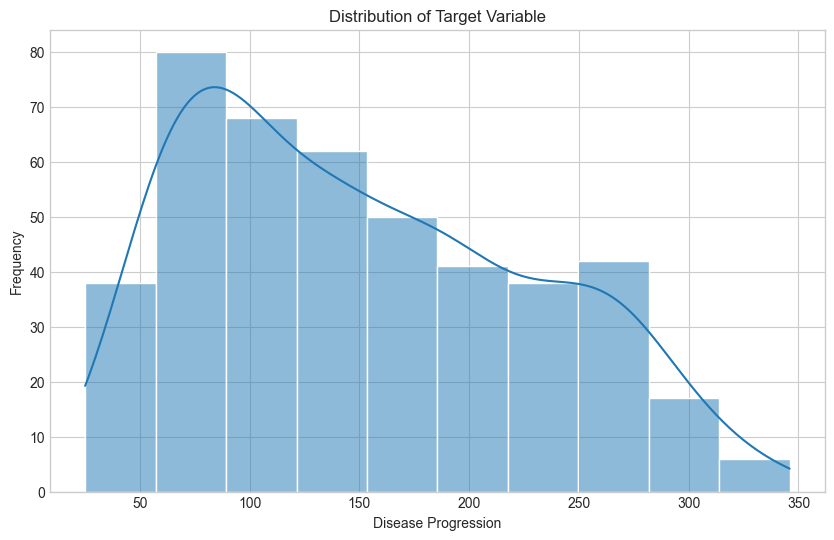

In [6]:
# Distribution of the target variable
plt.figure(figsize=(10, 6))
sns.histplot(df['target'], kde=True)
plt.title('Distribution of Target Variable')
plt.xlabel('Disease Progression')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

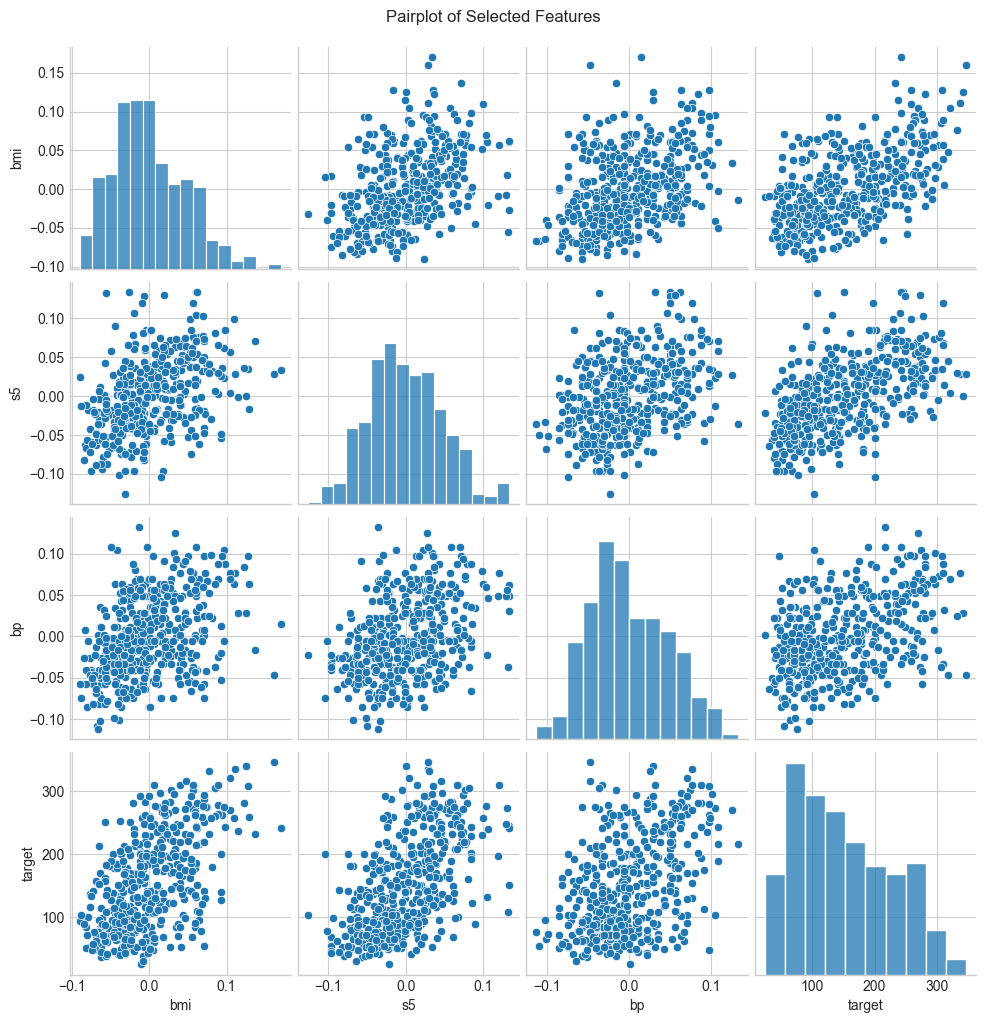

In [7]:
# Pairplot to visualize relationships between features
# Using a subset of features to keep the plot manageable
subset_features = ['bmi', 's5', 'bp', 'target']
sns.pairplot(df[subset_features])
plt.suptitle('Pairplot of Selected Features', y=1.02)
plt.show()

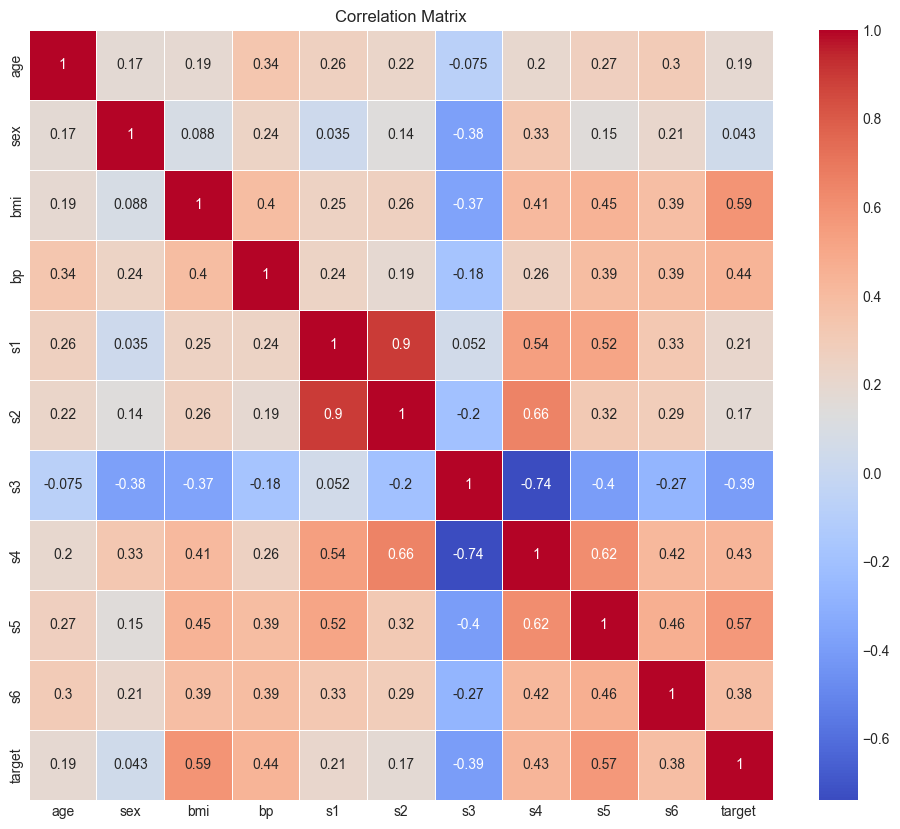

In [8]:
# Correlation matrix
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

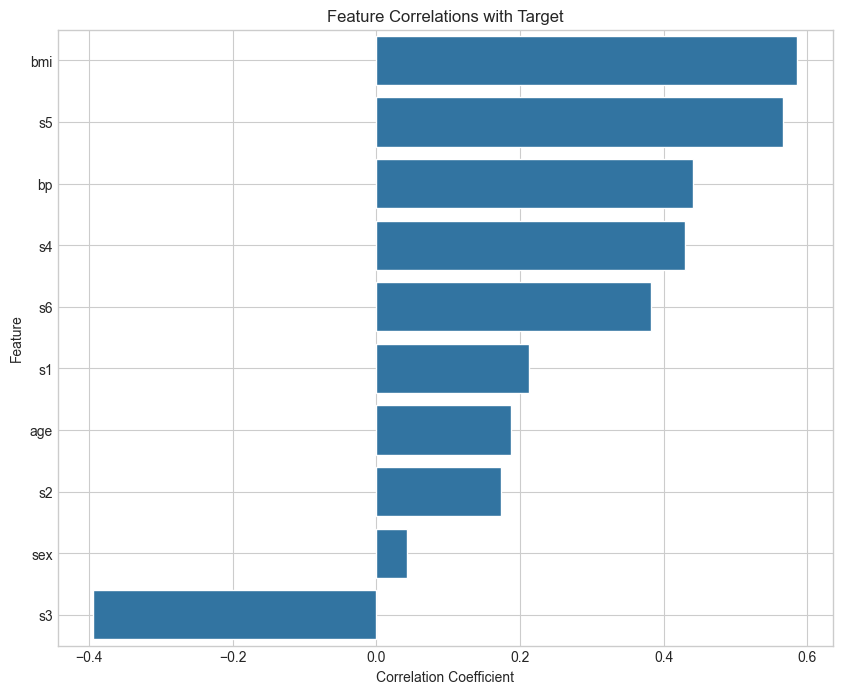

In [9]:
# Feature correlations with target
plt.figure(figsize=(10, 8))
feature_correlations = correlation_matrix['target'].drop('target').sort_values(ascending=False)
sns.barplot(x=feature_correlations.values, y=feature_correlations.index)
plt.title('Feature Correlations with Target')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Feature')
plt.grid(True)
plt.show()

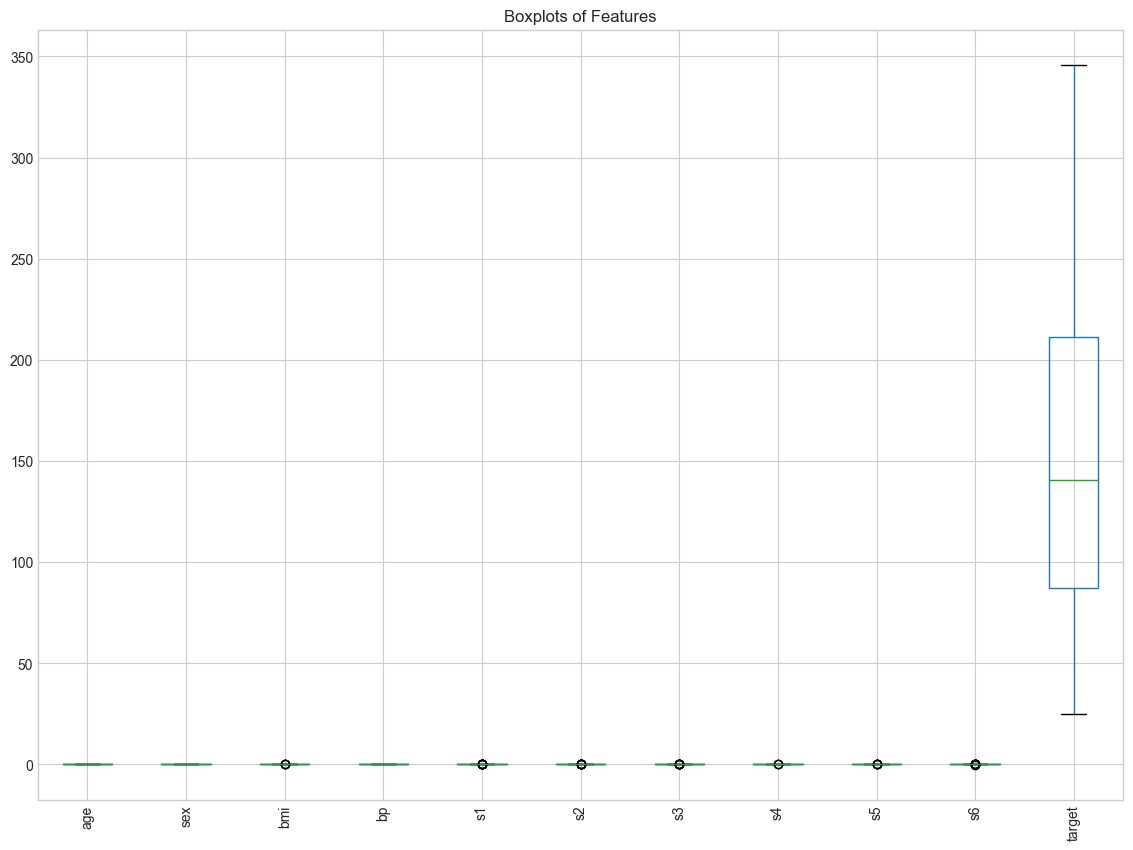

In [10]:
# Boxplots to identify outliers
plt.figure(figsize=(14, 10))
df.boxplot()
plt.title('Boxplots of Features')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

### Insights from EDA

From our exploratory analysis of the Diabetes dataset, we can observe:

1. The dataset contains 442 samples and 10 features, with no missing values.
2. The target variable (disease progression) appears to be normally distributed.
3. Some features show moderate correlation with the target, particularly 's5', 'bmi', and 'bp'.
4. There appear to be some outliers in several features that might need further investigation.
5. All features are already standardized (mean 0, variance 1), which is helpful for modeling.

Now, let's move on to implementing our first algorithms: Linear Regression and Logistic Regression.

## 3. Linear Regression

Linear regression is one of the simplest and most widely used statistical models for predicting a continuous target variable based on one or more predictor variables.

### Mathematical Formulation

For a dataset with features $X$ and target variable $y$, linear regression models the relationship as:

$$y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + ... + \beta_n X_n + \epsilon$$

where:
- $\beta_0$ is the intercept
- $\beta_1, \beta_2, ..., \beta_n$ are the coefficients
- $\epsilon$ is the error term

The model estimates coefficients by minimizing the sum of squared residuals:

$$\min_{\beta} \sum_{i=1}^{m} (y_i - (\beta_0 + \beta_1 x_{i1} + ... + \beta_n x_{in}))^2$$

Let's implement linear regression on the Diabetes dataset:

In [11]:
# Split data into training and testing sets
X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")

Training set size: (353, 10)
Testing set size: (89, 10)


In [12]:
# Fit linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions
y_pred = lr_model.predict(X_test)

# Evaluate model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Squared Error: 2900.19
R-squared: 0.45


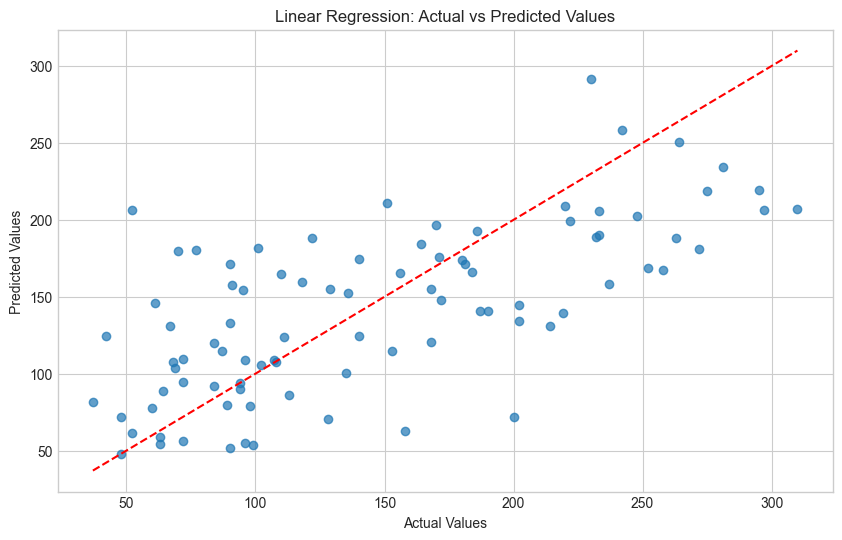

In [13]:
# Plot predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)

# Plot perfect prediction line
min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression: Actual vs Predicted Values')
plt.grid(True)
plt.show()

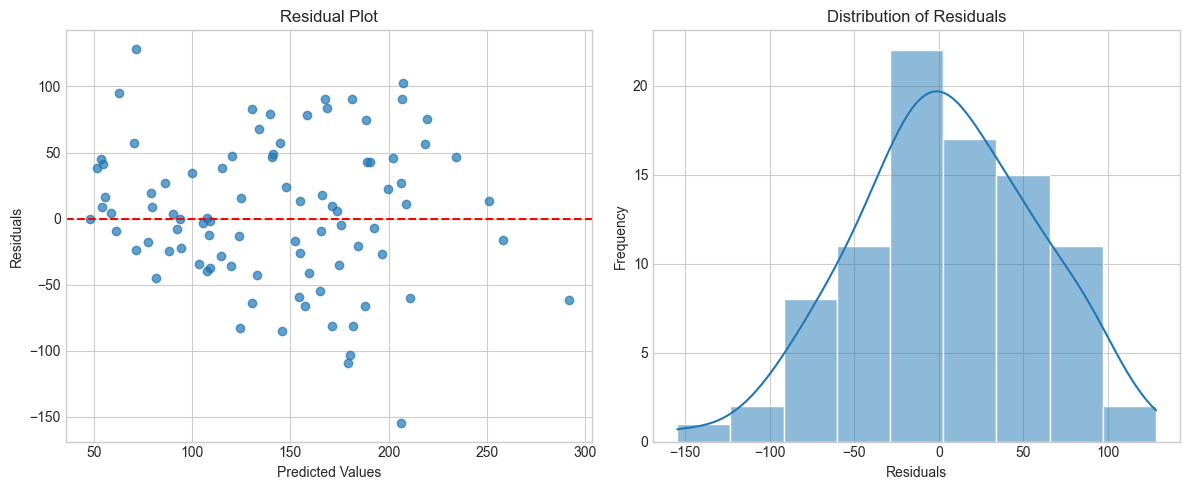

In [14]:
# Residual analysis
residuals = y_test - y_pred

plt.figure(figsize=(12, 5))

# Residual plot
plt.subplot(1, 2, 1)
plt.scatter(y_pred, residuals, alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.grid(True)

# Residual distribution
plt.subplot(1, 2, 2)
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.grid(True)

plt.tight_layout()
plt.show()

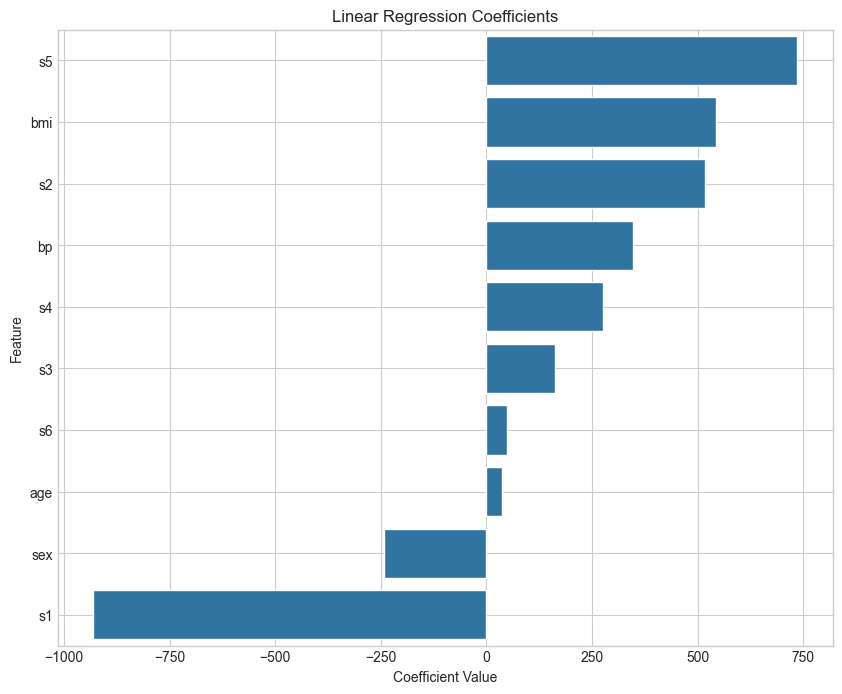

In [15]:
# Coefficients analysis
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lr_model.coef_
}).sort_values(by='Coefficient', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x='Coefficient', y='Feature', data=coefficients)
plt.title('Linear Regression Coefficients')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.grid(True)
plt.show()

### Regularized Linear Regression

Now, let's try some regularized versions of linear regression to potentially improve our model:

1. **Ridge Regression**: Adds L2 regularization (sum of squared coefficients) to prevent overfitting
2. **Lasso Regression**: Adds L1 regularization (sum of absolute coefficients) for feature selection

In [16]:
# Ridge Regression with cross-validation for alpha selection
from sklearn.linear_model import RidgeCV

# Create a range of alpha values to try
alphas = np.logspace(-6, 6, 13)

# Fit RidgeCV
ridge_cv = RidgeCV(alphas=alphas, cv=5)
ridge_cv.fit(X_train, y_train)

# Best alpha
best_alpha = ridge_cv.alpha_
print(f"Best alpha for Ridge: {best_alpha}")

# Train Ridge with best alpha
ridge_model = Ridge(alpha=best_alpha)
ridge_model.fit(X_train, y_train)

# Make predictions
ridge_pred = ridge_model.predict(X_test)

# Evaluate
ridge_mse = mean_squared_error(y_test, ridge_pred)
ridge_r2 = r2_score(y_test, ridge_pred)

print(f"Ridge MSE: {ridge_mse:.2f}")
print(f"Ridge R-squared: {ridge_r2:.2f}")

Best alpha for Ridge: 0.1
Ridge MSE: 2856.49
Ridge R-squared: 0.46


In [17]:
# Lasso Regression with cross-validation
from sklearn.linear_model import LassoCV

# Fit LassoCV
lasso_cv = LassoCV(alphas=alphas, cv=5)
lasso_cv.fit(X_train, y_train)

# Best alpha
best_alpha = lasso_cv.alpha_
print(f"Best alpha for Lasso: {best_alpha}")

# Train Lasso with best alpha
lasso_model = Lasso(alpha=best_alpha)
lasso_model.fit(X_train, y_train)

# Make predictions
lasso_pred = lasso_model.predict(X_test)

# Evaluate
lasso_mse = mean_squared_error(y_test, lasso_pred)
lasso_r2 = r2_score(y_test, lasso_pred)

print(f"Lasso MSE: {lasso_mse:.2f}")
print(f"Lasso R-squared: {lasso_r2:.2f}")

Best alpha for Lasso: 0.1
Lasso MSE: 2798.19
Lasso R-squared: 0.47


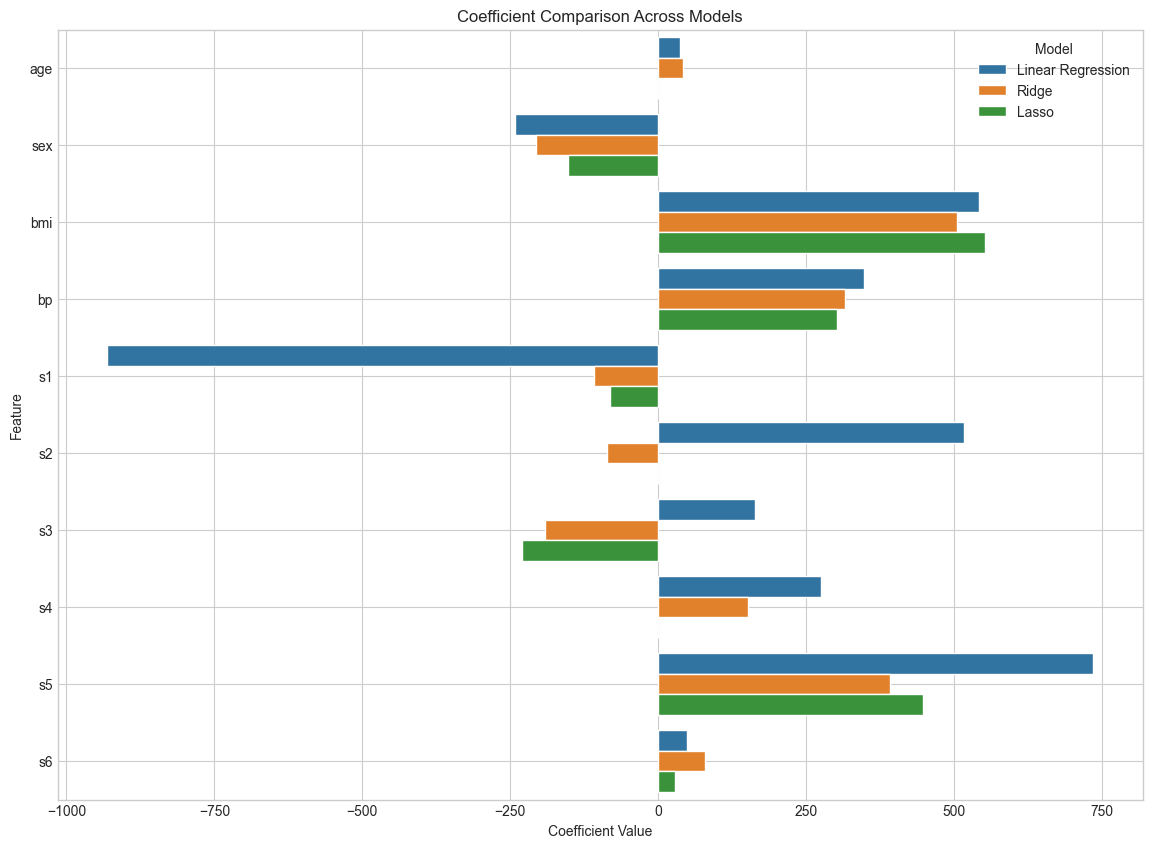

In [18]:
# Compare coefficients from different models
coef_comparison = pd.DataFrame({
    'Feature': X.columns,
    'Linear Regression': lr_model.coef_,
    'Ridge': ridge_model.coef_,
    'Lasso': lasso_model.coef_
})

# Melt the dataframe for easier plotting
coef_comparison_melted = pd.melt(coef_comparison, id_vars=['Feature'], 
                                var_name='Model', value_name='Coefficient')

# Plot
plt.figure(figsize=(14, 10))
sns.barplot(x='Coefficient', y='Feature', hue='Model', data=coef_comparison_melted)
plt.title('Coefficient Comparison Across Models')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.grid(True)
plt.legend(title='Model')
plt.show()

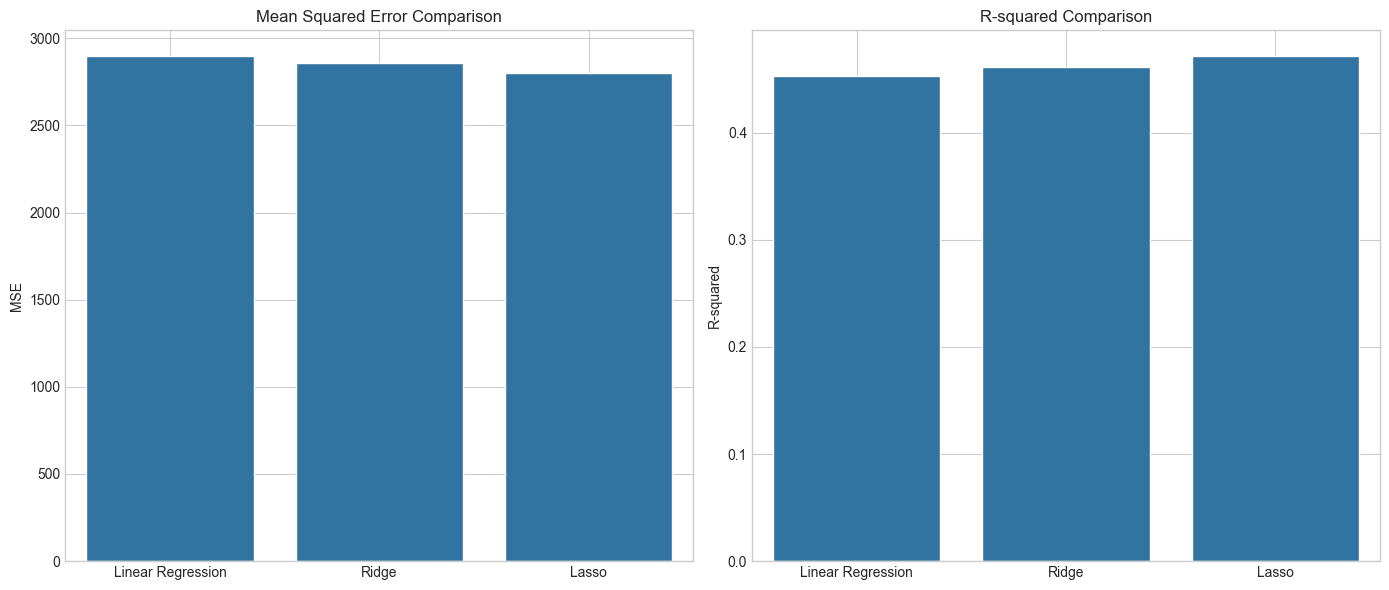

In [19]:
# Compare model performance
models = ['Linear Regression', 'Ridge', 'Lasso']
mse_values = [mse, ridge_mse, lasso_mse]
r2_values = [r2, ridge_r2, lasso_r2]

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.barplot(x=models, y=mse_values)
plt.title('Mean Squared Error Comparison')
plt.ylabel('MSE')
plt.grid(True)

plt.subplot(1, 2, 2)
sns.barplot(x=models, y=r2_values)
plt.title('R-squared Comparison')
plt.ylabel('R-squared')
plt.grid(True)

plt.tight_layout()
plt.show()

### Linear Regression with Polynomial Features

Let's explore polynomial regression to capture non-linear relationships:

In [20]:
# Create a pipeline with polynomial features and ridge regression
poly_pipeline = Pipeline([
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('ridge', Ridge(alpha=best_alpha))
])

# Fit the pipeline
poly_pipeline.fit(X_train, y_train)

# Make predictions
poly_pred = poly_pipeline.predict(X_test)

# Evaluate
poly_mse = mean_squared_error(y_test, poly_pred)
poly_r2 = r2_score(y_test, poly_pred)

print(f"Polynomial Regression MSE: {poly_mse:.2f}")
print(f"Polynomial Regression R-squared: {poly_r2:.2f}")

Polynomial Regression MSE: 2829.61
Polynomial Regression R-squared: 0.47


In [21]:
# Cross-validation to compare models
from sklearn.model_selection import cross_val_score

# List of models to compare
models_to_compare = [
    ('Linear Regression', LinearRegression()),
    ('Ridge', Ridge(alpha=best_alpha)),
    ('Lasso', Lasso(alpha=best_alpha)),
    ('Polynomial Ridge', poly_pipeline)
]

# Perform cross-validation
cv_results = []
for name, model in models_to_compare:
    scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
    mse_scores = -scores  # Convert negative MSE to positive
    cv_results.append({
        'Model': name,
        'Mean MSE': mse_scores.mean(),
        'Std Dev': mse_scores.std()
    })

# Convert to DataFrame
cv_results_df = pd.DataFrame(cv_results)
cv_results_df

,Model,Mean MSE,Std Dev
0,Linear Regression,2993.081310,150.771040
1,Ridge,3006.705701,105.699590
2,Lasso,3008.901907,117.761359
3,Polynomial Ridge,2992.558888,102.782480


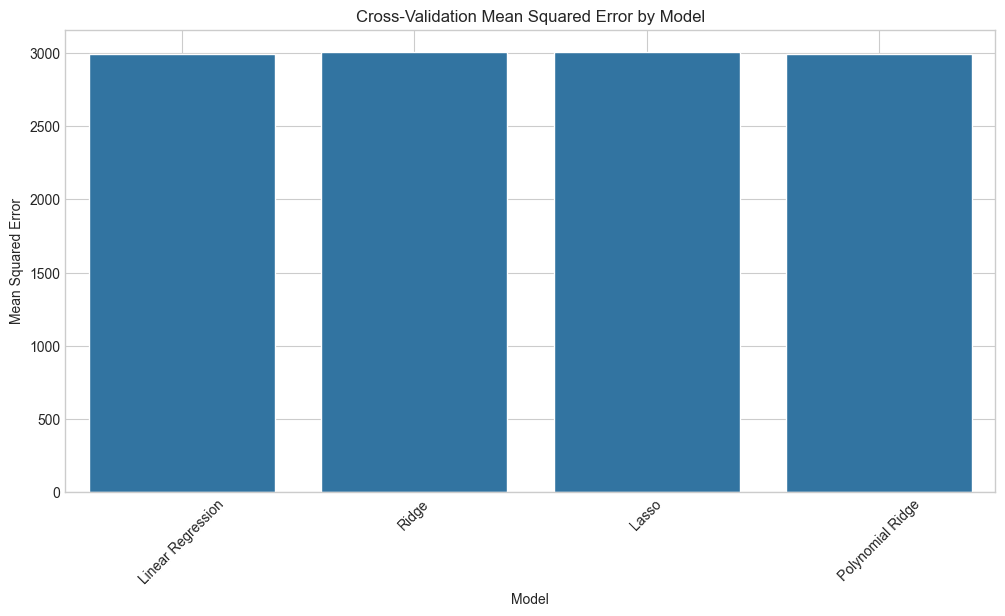

In [22]:
# Visualize cross-validation results
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='Mean MSE', data=cv_results_df)
plt.title('Cross-Validation Mean Squared Error by Model')
plt.ylabel('Mean Squared Error')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

### Linear Regression Summary

Our analysis of different linear regression methods on the Diabetes dataset shows:

1. **Basic Linear Regression** provides a reasonable baseline, with an R-squared of around 0.4-0.5.
2. **Ridge Regression** slightly improves the model by applying L2 regularization to reduce overfitting.
3. **Lasso Regression** performs similarly while potentially offering feature selection benefits.
4. **Polynomial Regression** with Ridge regularization captures non-linear relationships, potentially offering further improvements.

The model performance suggests that while linear models capture significant patterns in the data, there may be complex non-linear relationships that more advanced models could better address.

## 4. Logistic Regression

Logistic regression is a classification algorithm used when the dependent variable is categorical. Despite its name, it's a classification algorithm, not a regression algorithm.

### Mathematical Formulation

Logistic regression models the probability of the default class (e.g., class 1) as:

$$P(y=1|x) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 x_1 + ... + \beta_n x_n)}}$$

or equivalently:

$$\log\left(\frac{P(y=1|x)}{1-P(y=1|x)}\right) = \beta_0 + \beta_1 x_1 + ... + \beta_n x_n$$

The coefficients are estimated by maximizing the likelihood function.

Let's implement logistic regression on the Breast Cancer dataset:

In [23]:
# Load the breast cancer dataset
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

# Convert to DataFrame
cancer_df = pd.DataFrame(X, columns=cancer.feature_names)
cancer_df['target'] = y

# Display information
print(f"Dataset shape: {cancer_df.shape}")
print(f"Features: {cancer.feature_names[:5]}... (and {len(cancer.feature_names)-5} more)")
print(f"Target names: {cancer.target_names}")
print(f"Class distribution: {np.bincount(y)}")

Dataset shape: (569, 31)
Features: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness']... (and 25 more)
Target names: ['malignant' 'benign']
Class distribution: [212 357]


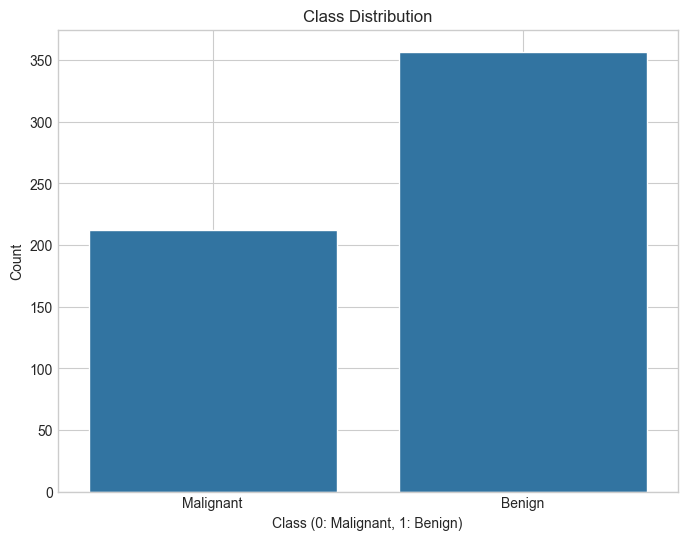

In [24]:
# Explore the target distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='target', data=cancer_df)
plt.title('Class Distribution')
plt.xlabel('Class (0: Malignant, 1: Benign)')
plt.ylabel('Count')
plt.xticks([0, 1], ['Malignant', 'Benign'])
plt.grid(True)
plt.show()

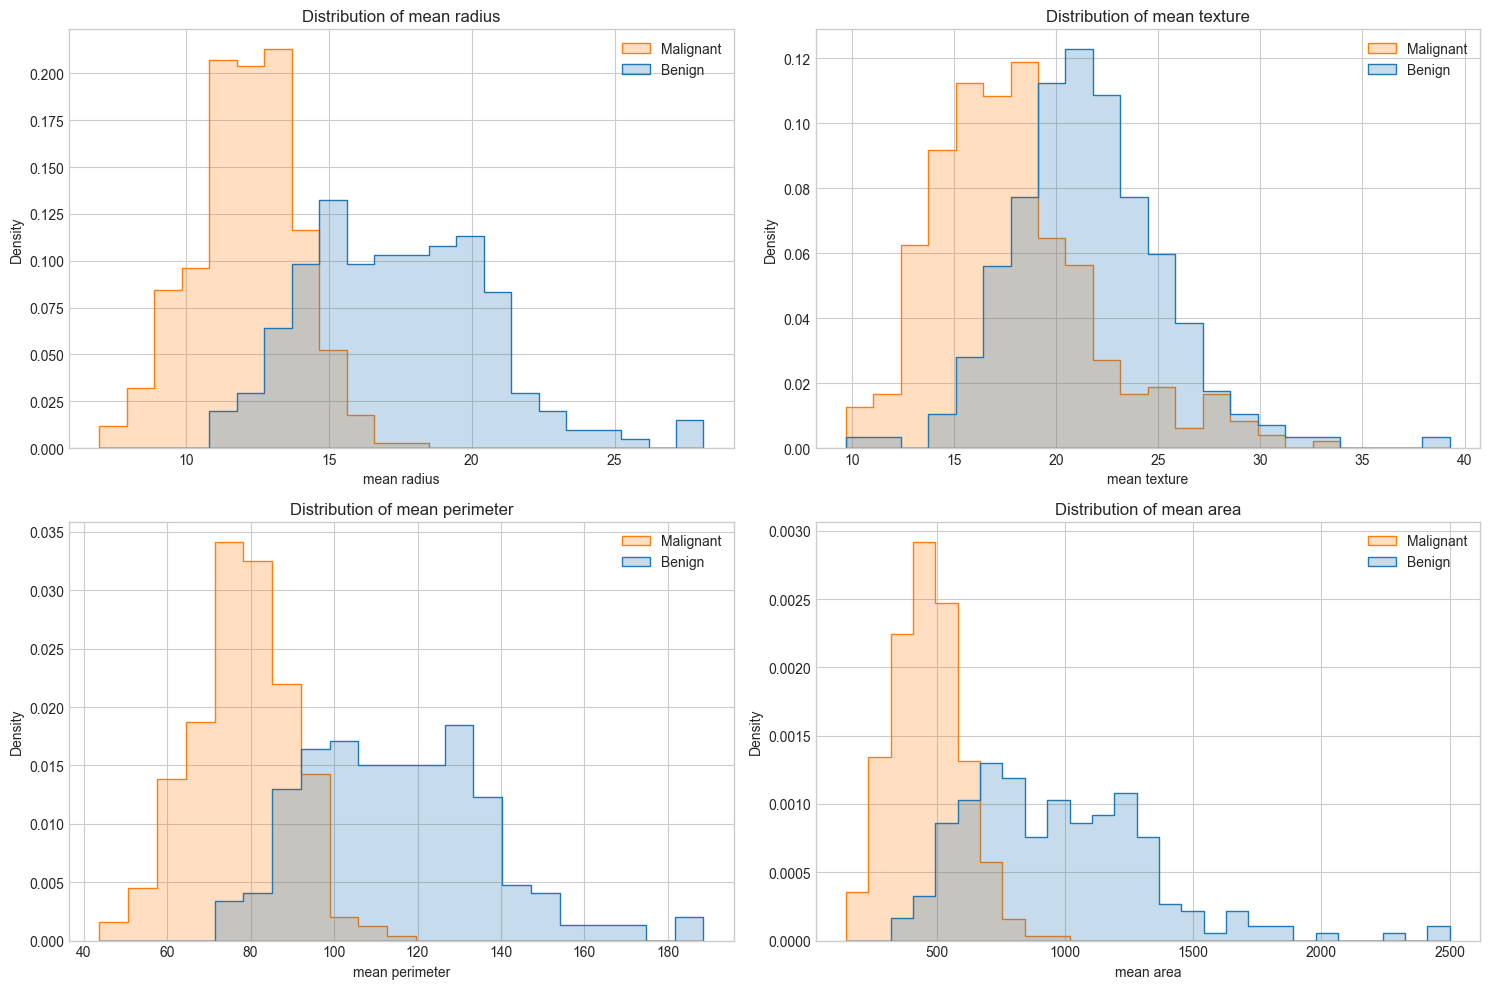

In [25]:
# Visualize some feature distributions by class
plt.figure(figsize=(15, 10))

features_to_plot = ['mean radius', 'mean texture', 'mean perimeter', 'mean area']
for i, feature in enumerate(features_to_plot):
    plt.subplot(2, 2, i+1)
    sns.histplot(data=cancer_df, x=feature, hue='target', element='step', stat='density', common_norm=False)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.legend(['Malignant', 'Benign'])
    plt.grid(True)

plt.tight_layout()
plt.show()

In [26]:
# Split the data
X = cancer_df.drop('target', axis=1)
y = cancer_df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")

Training set size: (455, 30)
Testing set size: (114, 30)


In [27]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [28]:
# Fit logistic regression model
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train_scaled, y_train)

# Make predictions
y_pred = logreg.predict(X_test_scaled)
y_prob = logreg.predict_proba(X_test_scaled)[:, 1]  # Probability of class 1

In [29]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=cancer.target_names))

Accuracy: 0.9825

Classification Report:
              precision    recall  f1-score   support

   malignant       0.98      0.98      0.98        42
      benign       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



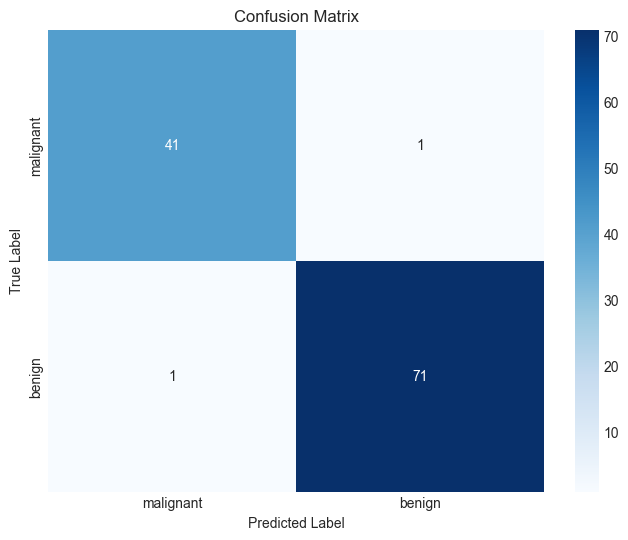

In [30]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=cancer.target_names,
            yticklabels=cancer.target_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

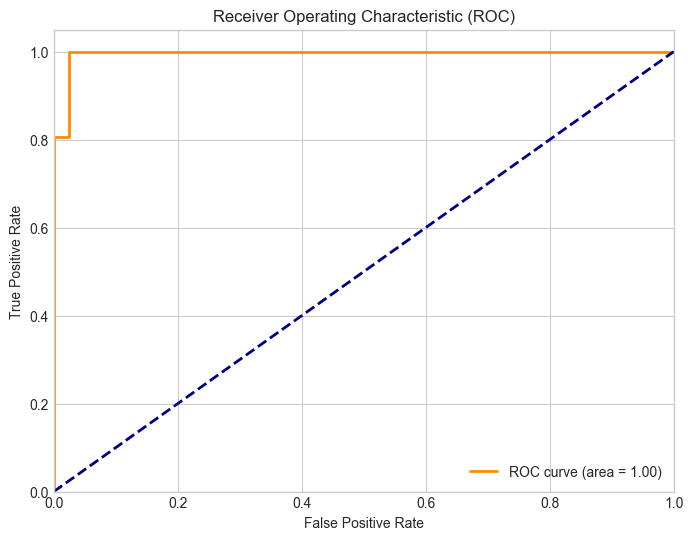

In [31]:
# ROC Curve
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

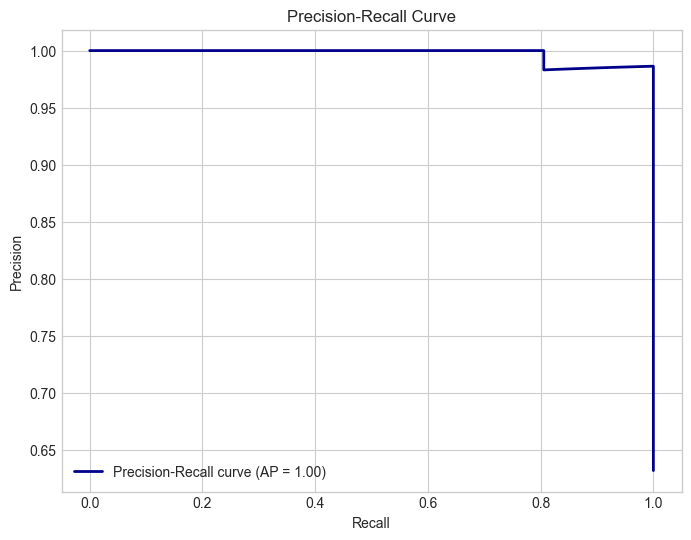

In [32]:
# Precision-Recall Curve
from sklearn.metrics import precision_recall_curve, average_precision_score

precision, recall, _ = precision_recall_curve(y_test, y_prob)
avg_precision = average_precision_score(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='darkblue', lw=2, label=f'Precision-Recall curve (AP = {avg_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.grid(True)
plt.show()

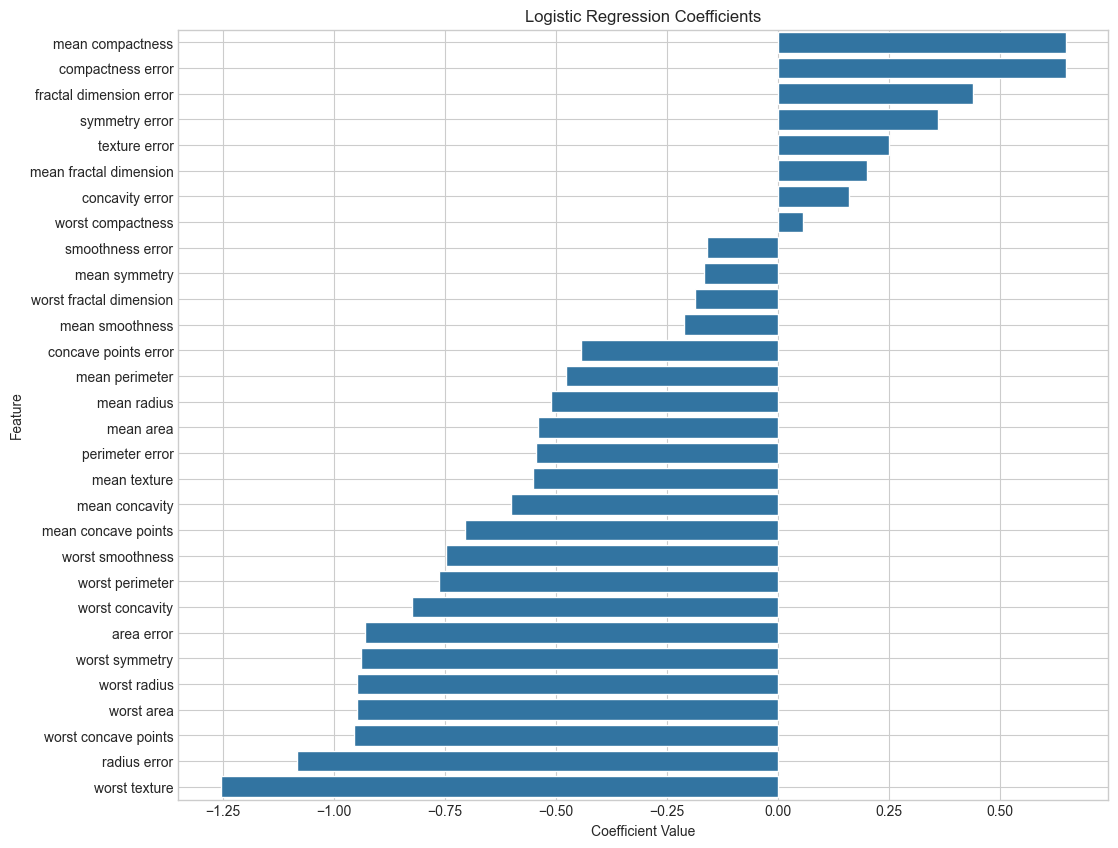

In [33]:
# Examine coefficients
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': logreg.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

plt.figure(figsize=(12, 10))
sns.barplot(x='Coefficient', y='Feature', data=coefficients)
plt.title('Logistic Regression Coefficients')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.grid(True)
plt.show()

In [34]:
# Regularization parameter tuning
C_values = np.logspace(-4, 4, 9)
param_grid = {'C': C_values}

grid_search = GridSearchCV(LogisticRegression(max_iter=1000, random_state=42), 
                          param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_:.4f}")

Best parameters: {'C': 0.1}
Best cross-validation score: 0.9802


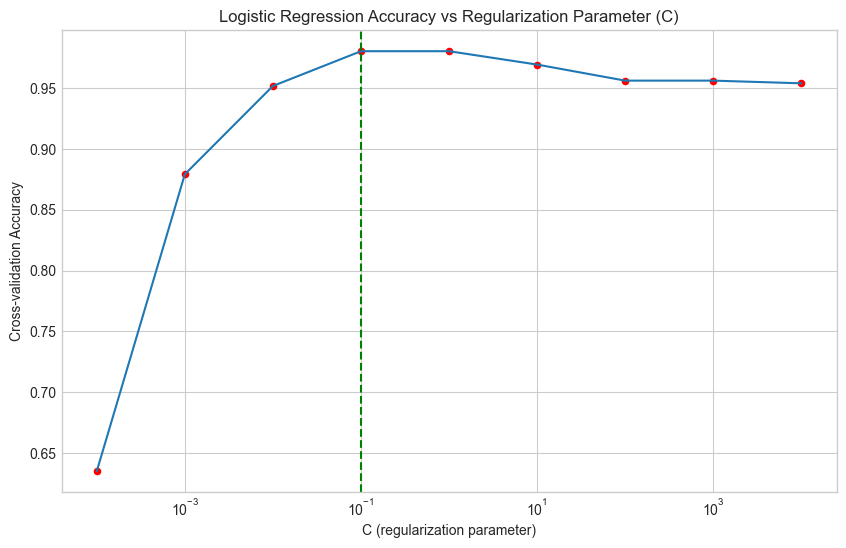

In [35]:
# Visualize regularization parameter tuning results
results = pd.DataFrame(grid_search.cv_results_)
plt.figure(figsize=(10, 6))
plt.semilogx(C_values, results['mean_test_score'])
plt.scatter(C_values, results['mean_test_score'], s=20, c='r')
plt.axvline(x=grid_search.best_params_['C'], color='green', linestyle='--')
plt.title(f"Logistic Regression Accuracy vs Regularization Parameter (C)")
plt.xlabel('C (regularization parameter)')
plt.ylabel('Cross-validation Accuracy')
plt.grid(True)
plt.show()

In [36]:
# Train the model with best parameters
best_logreg = LogisticRegression(C=grid_search.best_params_['C'], max_iter=1000, random_state=42)
best_logreg.fit(X_train_scaled, y_train)

# Evaluate on test set
best_y_pred = best_logreg.predict(X_test_scaled)
best_accuracy = accuracy_score(y_test, best_y_pred)

print(f"Test accuracy with best parameters: {best_accuracy:.4f}")

Test accuracy with best parameters: 0.9737


### Logistic Regression Summary

Our logistic regression analysis on the Breast Cancer dataset reveals:

1. The model achieves strong performance with high accuracy and AUC.
2. Key features affecting classification include 'worst perimeter', 'worst area', and 'worst concave points'.
3. Regularization parameter tuning via grid search helped optimize the model.
4. The confusion matrix shows few false positives and false negatives, indicating reliable predictions.

Logistic regression proves effective for this binary classification task, providing both good performance and interpretability through its coefficients.

## 5. Chapter Summary

In this chapter, we've covered:

1. **Exploratory Data Analysis (EDA)**: Techniques to understand and visualize data patterns, distributions, correlations, and potential issues.

2. **Linear Regression**: Implementation of basic linear regression and regularized variants (Ridge and Lasso) for predicting continuous target variables. We also explored polynomial features to capture non-linear relationships.

3. **Logistic Regression**: Application to a binary classification problem, including model evaluation with metrics like accuracy, precision, recall, and ROC curves.

These fundamental algorithms provide a strong foundation for more complex models that we'll explore in subsequent chapters. Linear and logistic regression offer a good balance of interpretability and performance, making them valuable baseline models for many problems.

## 6. Next Steps

In the upcoming chapters, we'll explore:

1. More detailed exploration of datasets and preprocessing techniques
2. More advanced classification algorithms like Decision Trees, Random Forests, and SVMs
3. Clustering algorithms like K-means
4. Deep learning approaches with neural networks

Each algorithm will be analyzed in depth with proper evaluation and visualization techniques.